In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

from scipy.stats import norm
from scipy.integrate import quad

def p(x): # distribution basée sur les données 
# représente les données, les observations, ou une distribution de probabilité mesurée
    return norm.pdf(x, -0.5, 1)
   

def q(x): # distribution cible
# représente plutôt une théorie, un modèle ou une approximation de P
    return norm.pdf(x, 0, 1)
 
def KL(x): # divergence de Kullback-Leibler : 
#mesure la distance statistique entre les 2 distributions de probabilité P et Q
    return p(x) * np.log( p(x) / q(x) )

range = np.arange(-10, 10, 0.001)

KL_int, err = quad(KL, -10, 10) 
print( 'KL: ', KL_int )



KL:  0.12499999999999994


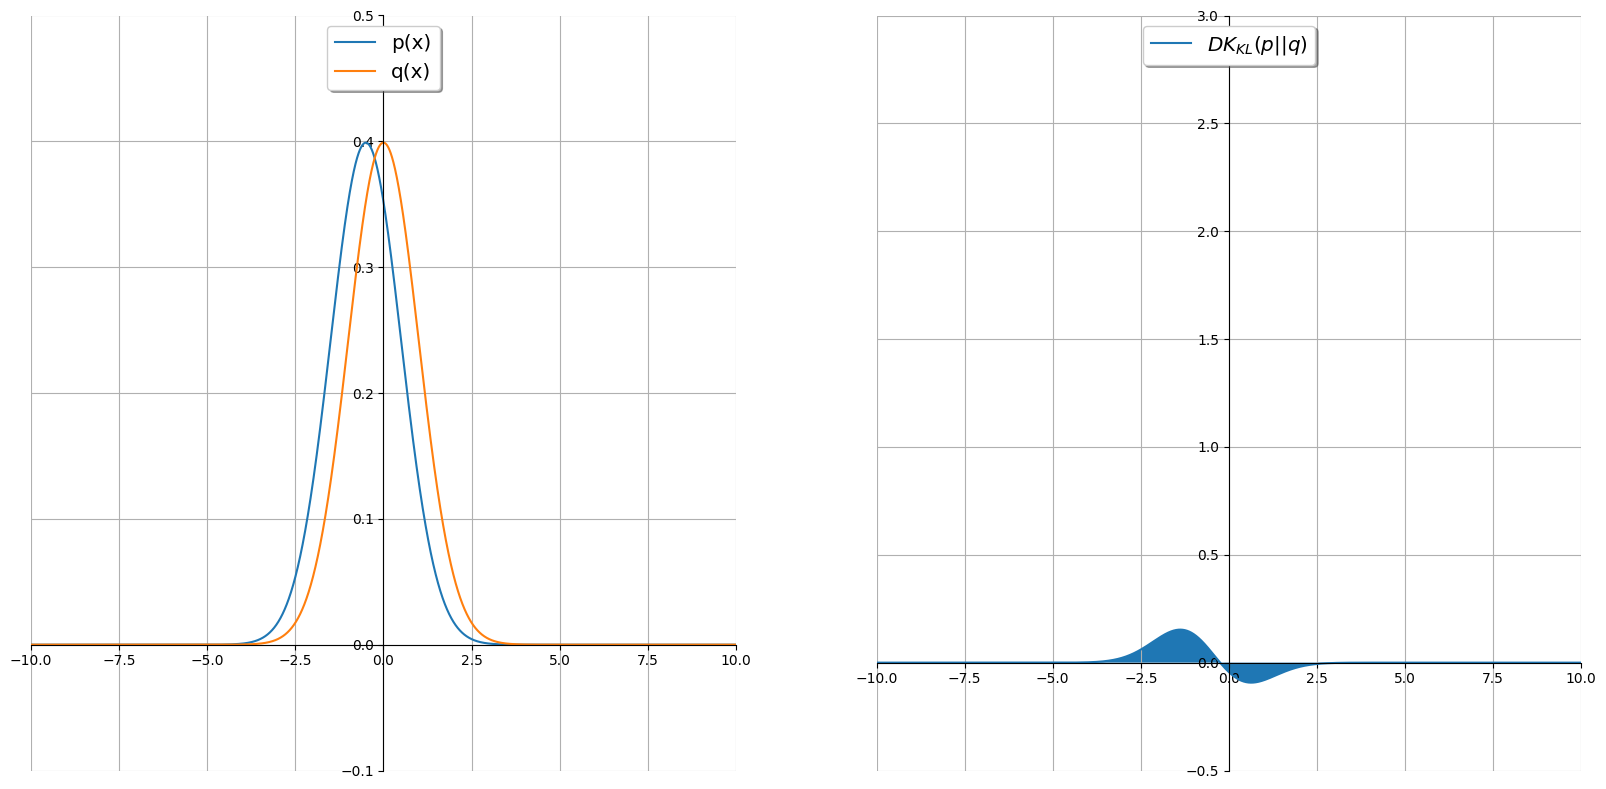

In [8]:

fig = plt.figure(figsize=(20, 10), dpi=100)

#---------- Graphique des distributions

ax = fig.add_subplot(1,2,1)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.5)

plt.plot(range, p(range),label='p(x)')
plt.plot(range, q(range),label='q(x)')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


#---------- Graphique de la divergence KL (p||q)

ax = fig.add_subplot(1,2,2)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.5,3)


ax.plot(range, KL(range),label='$DK_{KL}(p||q)$')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')



ax.fill_between(range, 0, KL(range))

plt.savefig('KullbackLeibler.png',bbox_inches='tight')
plt.show()
